In [1]:
from sklearn.preprocessing import StandardScaler
import h5py
import nat_asd_utils

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [73]:
# Path to the HDF5 file
hdf5_path = '../data/features/DM_pymoten.h5'
# Open the HDF5 file
with h5py.File(hdf5_path, 'r') as hdf5_file:
    # Access the dataset
    motion_features = hdf5_file['pymoten'][:]
# Print the shape of the loaded data
print(f'Motion features shape: {motion_features.shape}')

Motion features shape: (17997, 2162)


In [66]:
from scipy.signal import resample
from sklearn.random_projection import johnson_lindenstrauss_min_dim
from sklearn.random_projection import SparseRandomProjection
import hrf_tools

eps=0.5
scaler = StandardScaler()

X = resample(motion_features, 750, axis=0)
X = scaler.fit_transform(X=X,y=None)
n_samples=X.shape[0]
n_components=johnson_lindenstrauss_min_dim(n_samples=n_samples, eps=eps)
if n_components < n_samples:
    srp = SparseRandomProjection(n_components=n_components)
    X=srp.fit_transform( X )
hz=X.shape[0]/600 #703 seconds in friends
X=hrf_tools.apply_optimal_hrf_10hz(X,hz)


array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-8.56040046e-03,  1.54603906e-02, -1.99289038e-03, ...,
         1.56091945e-02, -4.11421852e-03,  7.03730807e-03],
       [-3.64268906e-02,  9.72676948e-02,  4.63412656e-03, ...,
         7.41973743e-02,  1.11283152e-03,  4.66959998e-02],
       ...,
       [ 1.34197104e+00, -4.05813038e-01, -2.06732035e+00, ...,
         4.41855812e+00,  2.02142715e+00,  4.92799789e-01],
       [ 1.51628089e+00, -3.82907391e-01, -1.97014713e+00, ...,
         4.14382458e+00,  2.36567092e+00,  4.29601461e-01],
       [ 1.61011636e+00, -2.59750605e-01, -2.00036836e+00, ...,
         4.05344772e+00,  2.71862292e+00,  4.18294221e-01]], dtype=float32)

In [7]:
import numpy as np

In [19]:
import pilot
X,features=pilot.load_features('motion_srp05')
X.shape

(750, 317)

In [74]:
# X1,features=pilot.load_features('cochresnet50pca1hrfssfirst')
# X1,features=pilot.load_features('cochresnet50pca1_flat')
X1,features=pilot.load_features('concatspeech')
X1.shape
# X1 = [x[:,0] for x in X1]
# X.append(X1[4])
# X.append(X1[5])

(5, 749)

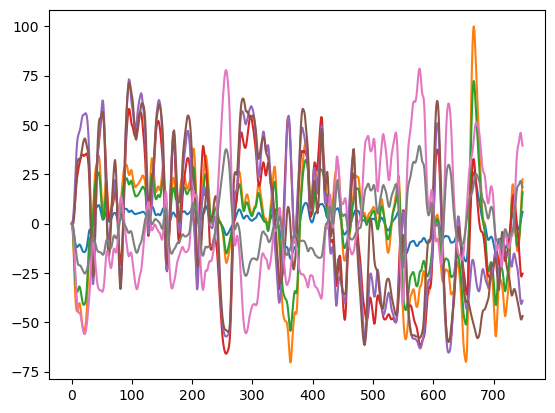

In [51]:
plt.plot(X1)

In [1]:
#%run pilot.py -s 01 -p a4a5 -f cochresnet50pca1hrffriends_s01e02a -t s01e02a -d 0
with open('good_pilots_ru_dm_list.txt', 'r') as file:
    sub_list = file.readlines()
good_subjects_list = [line.strip() for line in sub_list]

for s in good_subjects_list:


    %run pilot.py -s {s} -p MT -f motion -d 0 -r

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


running subject NDARHJ830RXD
loaded brain data
run ridgecv
No value was passed to args.bootstrap
X: (750, 2162)
Y: (746, 100)
X: (726, 2162)
Y: (726, 100)
train feat,  (581, 2162)
train data,  (581, 100)
fold 0 test R^2 Score:  -1.83
fold 0 train R^2 Score:  1.00
train feat,  (581, 2162)
train data,  (581, 100)
fold 1 test R^2 Score:  -0.75
fold 1 train R^2 Score:  1.00
train feat,  (581, 2162)
train data,  (581, 100)
fold 2 test R^2 Score:  -3.09
fold 2 train R^2 Score:  1.00
train feat,  (581, 2162)
train data,  (581, 100)
fold 3 test R^2 Score:  -1.38
fold 3 train R^2 Score:  1.00
train feat,  (580, 2162)
train data,  (580, 100)
fold 4 test R^2 Score:  -0.81
fold 4 train R^2 Score:  1.00
18.451923847198486
saving results
MEAN test R^2 Score:  -1.57
MEAN train R^2 Score:  1.00
running subject NDARVB897AH1
loaded brain data
run ridgecv
No value was passed to args.bootstrap
X: (750, 2162)
Y: (750, 100)
X: (730, 2162)
Y: (730, 100)
train feat,  (584, 2162)
train data,  (584, 100)
fold 0

In [ ]:
for s in good_subjects_list[:1]:
    %run pilot.py -s {s} -p MT -f motion -d 0 -e

running subject NDARHJ830RXD
loaded brain data
run elasticnetcv
No value was passed to args.bootstrap
X: (750, 2162)
Y: (746, 100)
X: (726, 2162)
Y: (726, 100)


In [28]:
# for s in ['01','02','03','04','05','06',]:
for s in ['01']:
    %run pilot.py -s {s} -p MT -f motion_srp05_friends_s01e02a -t s01e02a -d 0 -r

running subject 01
loaded brain data
run ridgecv
No value was passed to args.bootstrap
fold 0 test R^2 Score:  -0.26
fold 0 train R^2 Score:  0.74
fold 1 test R^2 Score:  -1.06
fold 1 train R^2 Score:  0.76
fold 2 test R^2 Score:  -0.93
fold 2 train R^2 Score:  0.76
fold 3 test R^2 Score:  -1.20
fold 3 train R^2 Score:  0.76
fold 4 test R^2 Score:  -1.06
fold 4 train R^2 Score:  0.77
fold 5 test R^2 Score:  -1.15
fold 5 train R^2 Score:  0.77
fold 6 test R^2 Score:  -1.19
fold 6 train R^2 Score:  0.76
fold 7 test R^2 Score:  -0.70
fold 7 train R^2 Score:  0.77
fold 8 test R^2 Score:  -0.76
fold 8 train R^2 Score:  0.76
fold 9 test R^2 Score:  -0.38
fold 9 train R^2 Score:  0.76
(10,)
4.017336845397949
saving results
MEAN test R^2 Score:  -0.87
MEAN train R^2 Score:  0.76


In [29]:
# for s in ['01','02','03','04','05','06',]:
for s in ['01']:
    %run pilot.py -s {s} -p MT -f motion_friends_s01e02a -t s01e02a -d 0 -n

running subject 01
loaded brain data
run elasticnetcv
No value was passed to args.bootstrap
X: (471, 2162)
Y: (472, 100)
X: (451, 2162)
Y: (451, 100)



KeyboardInterrupt



In [9]:
from stacking_fmri import fit_predict

In [ ]:
# set random seed for SRP

In [ ]:
#run raw feature with ridgecv
#run srp 05 and 01 reduced feature ridgecv